<a href="https://colab.research.google.com/github/shrad1997/Forecasting/blob/main/Forecasting_Airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns  

In [2]:
data = pd.read_excel("/content/Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


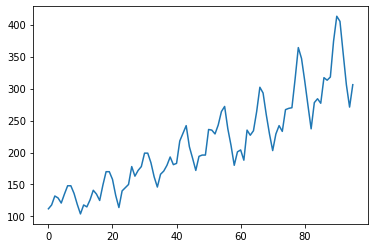

In [3]:
data.Passengers.plot()

In [4]:
data.shape

(96, 2)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [6]:
data.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


In [7]:
data['year'] = data['Month'].dt.year
data['day'] = data['Month'].dt.day
data['month'] = data['Month'].dt.month


In [8]:
data

,Month,Passengers,year,day,month
0,1995-01-01,112,1995,1,1
1,1995-02-01,118,1995,1,2
2,1995-03-01,132,1995,1,3
3,1995-04-01,129,1995,1,4
4,1995-05-01,121,1995,1,5
...,...,...,...,...,...
91,2002-08-01,405,2002,1,8
92,2002-09-01,355,2002,1,9
93,2002-10-01,306,2002,1,10
94,2002-11-01,271,2002,1,11


In [9]:
data.day.unique()

array([1])

In [10]:
dummy=pd.DataFrame(pd.get_dummies(data['month']))

In [11]:
data=pd.concat((data,dummy),axis=1)

In [12]:
data.head(5)

,Month,Passengers,year,day,month,1,2,3,4,5,6,7,8,9,10,11,12
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0


In [13]:
data.shape

(96, 17)

In [14]:
t= np.arange(1,97)
data['t']=t
data['t_square']=data['t']*data['t']

In [15]:
log_Pass=np.log(data['Passengers'])
data['log_Pass']=log_Pass

In [16]:
data.head(5)

,Month,Passengers,year,day,month,1,2,3,4,5,6,7,8,9,10,11,12,t,t_square,log_Pass
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [17]:
data.columns

Index([     'Month', 'Passengers',       'year',        'day',      'month',
                  1,            2,            3,            4,            5,
                  6,            7,            8,            9,           10,
                 11,           12,          't',   't_square',   'log_Pass'],
      dtype='object')

In [18]:
data.rename(columns={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'},inplace=True)

In [19]:
data.head()

,Month,Passengers,year,day,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_Pass
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


#Visualising data

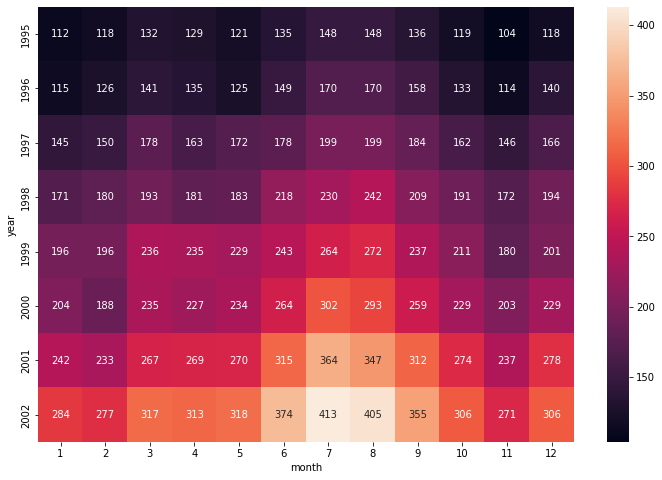

In [20]:
plt.figure(figsize=(12,8))
heatmap_year= pd.pivot_table(data=data,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_year,annot=True,fmt="g")

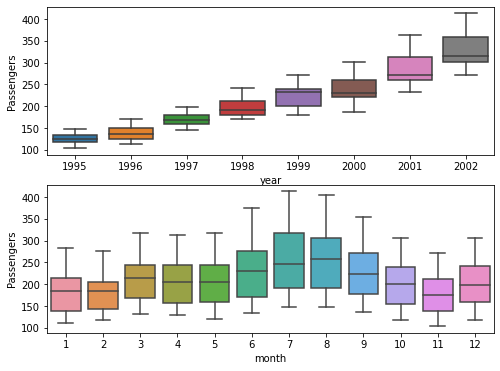

In [21]:
# Boxplot 
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="year",y="Passengers",data=data)
plt.subplot(212)
sns.boxplot(x="month",y="Passengers",data=data)

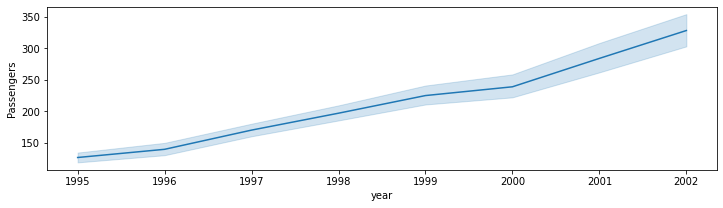

In [22]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=data)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


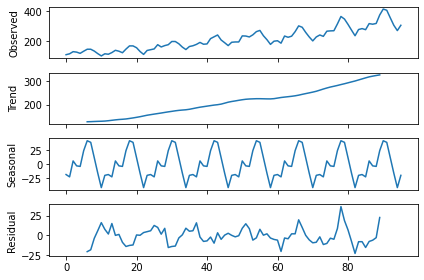

In [23]:
from statsmodels.tsa.seasonal import seasonal_decompose
decompose_ts_add = seasonal_decompose(data.Passengers,freq=12)
decompose_ts_add.plot()
plt.show()

#Spilitting data

In [24]:
Train= data.head(76)
Test=data.tail(20)

In [25]:
data.columns

Index(['Month', 'Passengers', 'year', 'day', 'month', 'Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 't',
       't_square', 'log_Pass'],
      dtype='object')

#Building a models and checking for RMSE value of different model

In [26]:
#Linear Model
import statsmodels.formula.api as smf 

linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2)) 
rmse_linear

57.00014788256584

In [27]:
#Exponential

Exp = smf.ols('log_Pass~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

46.62154394719377

In [28]:
#Quadratic 

Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

58.494274639472664

In [29]:
#Additive seasonality 

add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

132.25413439949475

In [30]:
#Additive Seasonality Quadratic 

add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad 

39.759766338063685

In [31]:
##Multiplicative Seasonality

Mul_sea = smf.ols('log_Pass~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea 

137.6109085625647

In [32]:
#Multiplicative Additive Seasonality 

Mul_Add_sea = smf.ols('log_Pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea  

11.784250178871785

In [34]:
#Compare the results 

RMSE = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(RMSE)
table_rmse.sort_values(['RMSE_Values']) 

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.784250
4,rmse_add_sea_quad,39.759766
1,rmse_Exp,46.621544
0,rmse_linear,57.000148
2,rmse_Quad,58.494275
3,rmse_add_sea,132.254134
5,rmse_Mult_sea,137.610909


#Building a model on dataset

In [35]:
data.head()

,Month,Passengers,year,day,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_Pass
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791


In [36]:
#Build data on entire dataset
model=smf.ols('log_Pass~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov+Dec',data =data).fit()

In [37]:
pred_log  = pd.Series(model.predict(data)) 
pred_log.head(10)

0    4.692963
1    4.703487
2    4.846666
3    4.813814
4    4.807291
5    4.931133
6    5.037387
7    5.035271
8    4.925032
9    4.794920
dtype: float64

In [38]:
data['pred_log']=pred_log

In [39]:
data.head(10)

,Month,Passengers,year,day,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_Pass,pred_log
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499,4.692963
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685,4.703487
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802,4.846666
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812,4.813814
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791,4.807291
5,1995-06-01,135,1995,1,6,0,0,0,0,0,1,0,0,0,0,0,0,6,36,4.905275,4.931133
6,1995-07-01,148,1995,1,7,0,0,0,0,0,0,1,0,0,0,0,0,7,49,4.997212,5.037387
7,1995-08-01,148,1995,1,8,0,0,0,0,0,0,0,1,0,0,0,0,8,64,4.997212,5.035271
8,1995-09-01,136,1995,1,9,0,0,0,0,0,0,0,0,1,0,0,0,9,81,4.912655,4.925032
9,1995-10-01,119,1995,1,10,0,0,0,0,0,0,0,0,0,1,0,0,10,100,4.779123,4.794920


In [42]:
data['pred_new']=np.exp(data['pred_log'])

In [43]:
data.head(5)

,Month,Passengers,year,day,month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,t,t_square,log_Pass,pred_log,pred_new
0,1995-01-01,112,1995,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,4.718499,4.692963,109.176148
1,1995-02-01,118,1995,1,2,0,1,0,0,0,0,0,0,0,0,0,0,2,4,4.770685,4.703487,110.331245
2,1995-03-01,132,1995,1,3,0,0,1,0,0,0,0,0,0,0,0,0,3,9,4.882802,4.846666,127.315234
3,1995-04-01,129,1995,1,4,0,0,0,1,0,0,0,0,0,0,0,0,4,16,4.859812,4.813814,123.200587
4,1995-05-01,121,1995,1,5,0,0,0,0,1,0,0,0,0,0,0,0,5,25,4.795791,4.807291,122.399578
